In [75]:
%load_ext pycodestyle_magic

%pycodestyle_off

import sys
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from pytest import approx

from matplotlib.ticker import FuncFormatter


importlib.reload(sys)
#sys.setdefaultencoding("utf-8")

<module 'sys' (built-in)>

In [2]:
incidentes_viales_df = pd.read_csv("../data/incidentes-viales-c5.csv")

In [3]:
len(incidentes_viales_df)

1383138

In [4]:
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

In [5]:
# con talacha
def numeric_profiling(df_o, col):
    """
    Profiling for numeric columns.

    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    # eliminate missing values
    df = df_o.copy()
    df = df[df[col].notna()]
    df[col] = df[col].astype(float)

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique()}
                     # 'prop_missings': df[col].isna().sum()/df.shape[0]*100,
                     # 'top1_repeated': get_repeated_values(df, col, 1),
                     # 'top2_repeated': get_repeated_values(df, col, 2),
                     # 'top3_repeated': get_repeated_values(df, col, 3)
                     )

    return profiling

18:22: E128 continuation line under-indented for visual indent
19:22: E128 continuation line under-indented for visual indent
20:22: E128 continuation line under-indented for visual indent
21:22: E128 continuation line under-indented for visual indent
22:22: E128 continuation line under-indented for visual indent
23:22: E128 continuation line under-indented for visual indent
24:22: E128 continuation line under-indented for visual indent
25:22: E128 continuation line under-indented for visual indent


In [6]:
incidentes_viales_df.columns

Index(['folio', 'fecha_creacion', 'hora_creacion', 'dia_semana',
       'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre',
       'hora_cierre', 'delegacion_inicio', 'incidente_c4', 'latitud',
       'longitud', 'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'geopoint', 'mes'],
      dtype='object')

Se pueden eliminar:

    + Geopoint
    + Mes o mes_cierre
    + Folio
    + 

In [9]:
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r"(A) La unidad de atención a emergencias fue despachada, "
                                        "llegó al lugar de los hechos y confirmó la emergencia reportada",
                                        'A', inplace=True)
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r'(N) La unidad de atención a emergencias fue despachada, '
                                        'llegó al lugar de los hechos, pero en el sitio del evento '
                                        'nadie solicitó el apoyo de la unidad',
                                        'N', inplace=True)
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r'(D) El incidente reportado se registró en dos o más '
                                        'ocasiones procediendo a mantener un único reporte (afirmativo,'
                                        ' informativo, negativo o falso) como el identificador para el '
                                        'incidente',
                                        'D', inplace=True)
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r'(F) El operador/a o despachador/a identifican, antes de dar '
                                        'respuesta a la emergencia, que ésta es falsa. O al ser '
                                        'despachada una unidad de atención a emergencias en el lugar '
                                        'de los hechos se percatan que el incidente no corresponde al '
                                        'reportado inicialmente',
                                        'F', inplace=True)
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r'(I) El incidente reportado es afirmativo y se añade '
                                        'información adicional al evento',
                                        'I', inplace=True)

2:80: E501 line too long (99 > 79 characters)
3:80: E501 line too long (106 > 79 characters)
6:80: E501 line too long (99 > 79 characters)
7:80: E501 line too long (100 > 79 characters)
11:80: E501 line too long (95 > 79 characters)
12:80: E501 line too long (104 > 79 characters)
13:80: E501 line too long (104 > 79 characters)
17:80: E501 line too long (103 > 79 characters)
18:80: E501 line too long (97 > 79 characters)
19:80: E501 line too long (102 > 79 characters)
20:80: E501 line too long (103 > 79 characters)
24:80: E501 line too long (95 > 79 characters)


In [8]:
incidentes_viales_df.codigo_cierre

0          A
1          A
2          N
3          N
4          A
          ..
1383133    A
1383134    A
1383135    D
1383136    D
1383137    D
Name: codigo_cierre, Length: 1383138, dtype: object

In [12]:
def generate_label(incidentes_viales_df):
    incidentes_viales_df['label'] = np.where(
        (incidentes_viales_df.codigo_cierre == 'F') | (incidentes_viales_df.codigo_cierre == 'N'), 1, 0)

3:80: E501 line too long (104 > 79 characters)


In [13]:
generate_label(incidentes_viales_df)

In [11]:
incidentes_viales_df['label']

0          0
1          0
2          1
3          1
4          0
          ..
1383133    0
1383134    0
1383135    0
1383136    0
1383137    0
Name: label, Length: 1383138, dtype: int64

In [12]:
for column in incidentes_viales_df.columns:
    print(column, ", valores únicos: ", len(incidentes_viales_df[column].unique()))

folio , valores únicos:  1383138
fecha_creacion , valores únicos:  2637
hora_creacion , valores únicos:  105887
dia_semana , valores únicos:  7
codigo_cierre , valores únicos:  5
fecha_cierre , valores únicos:  2621
año_cierre , valores únicos:  7
mes_cierre , valores únicos:  12
hora_cierre , valores únicos:  106827
delegacion_inicio , valores únicos:  17
incidente_c4 , valores únicos:  26
latitud , valores únicos:  82502
longitud , valores únicos:  78985
clas_con_f_alarma , valores únicos:  4
tipo_entrada , valores únicos:  9
delegacion_cierre , valores únicos:  17


2:80: E501 line too long (83 > 79 characters)


geopoint , valores únicos:  134289
mes , valores únicos:  12
label , valores únicos:  2


In [13]:
incidentes_viales_df['delegacion_inicio'].unique()

array(['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN',
       'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'GUSTAVO A. MADERO',
       'TLAHUAC', 'CUAUHTEMOC', 'COYOACAN', 'IZTAPALAPA', 'BENITO JUAREZ',
       'AZCAPOTZALCO', 'IZTACALCO', 'MILPA ALTA', 'ALVARO OBREGON',
       'XOCHIMILCO', nan], dtype=object)

In [14]:
for column in incidentes_viales_df.columns:
    val_nulos = incidentes_viales_df[column].isnull().sum()
    if val_nulos != 0:
        print(column, "tiene", val_nulos, "valores nulos")

delegacion_inicio tiene 158 valores nulos
latitud tiene 443 valores nulos
longitud tiene 435 valores nulos
delegacion_cierre tiene 140 valores nulos
geopoint tiene 446 valores nulos


In [15]:
incidentes_viales_df["incidente_c4"].unique()

array(['accidente-choque sin lesionados',
       'accidente-choque con lesionados',
       'lesionado-accidente automovilístico', 'accidente-volcadura',
       'lesionado-atropellado', 'accidente-otros',
       'accidente-persona atrapada / desbarrancada',
       'cadáver-accidente automovilístico', 'cadáver-atropellado',
       'accidente-motociclista', 'accidente-vehiculo desbarrancado',
       'accidente-choque con prensados', 'accidente-vehiculo atrapado',
       'accidente-ciclista', 'accidente-monopatín',
       'sismo-choque con lesionados',
       'accidente-vehículo atrapado-varado',
       'detención ciudadana-atropellado', 'accidente-ferroviario',
       'detención ciudadana-accidente automovilístico',
       'sismo-choque sin lesionados', 'sismo-persona atropellada',
       'Detención ciudadana-accidente automovilístico',
       'sismo-choque con prensados',
       'mi ciudad-calle-incidente de tránsito',
       'mi ciudad-taxi-incidente de tránsito'], dtype=object)

In [16]:
incidente_c4_falso = incidentes_viales_df.groupby("incidente_c4", as_index=False).sum()
incidente_c4_falso = incidente_c4_falso.drop(columns=['año_cierre', 'latitud', 'longitud', 'mes'], axis=1)

1:80: E501 line too long (87 > 79 characters)
2:80: E501 line too long (106 > 79 characters)


In [17]:
incidente_c4_falso.sort_values(by='label', ascending=False)

,incidente_c4,label
3,accidente-choque sin lesionados,198694
1,accidente-choque con lesionados,43678
19,lesionado-atropellado,25102
7,accidente-motociclista,7758
13,accidente-volcadura,2881
9,accidente-persona atrapada / desbarrancada,1197
18,lesionado-accidente automovilístico,884
4,accidente-ciclista,487
8,accidente-otros,461
10,accidente-vehiculo atrapado,314


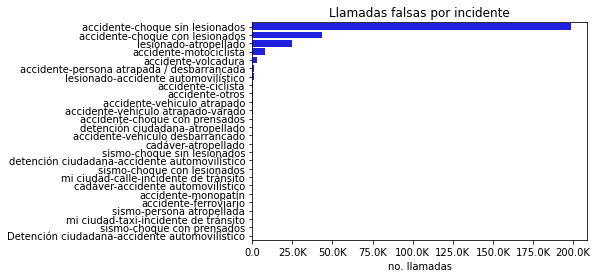

3:80: E501 line too long (82 > 79 characters)


In [18]:
ax = sns.barplot(x="label",
                 y="incidente_c4",
                 data=incidente_c4_falso.sort_values(by='label', ascending=False),
                 color="b")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por incidente",
       xlabel="no. llamadas",
       ylabel="")
plt.show()

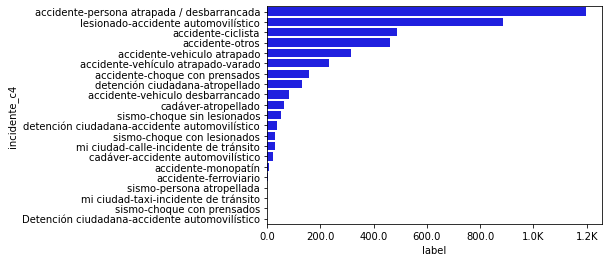

3:80: E501 line too long (91 > 79 characters)


In [19]:
ax = sns.barplot(x="label",
                 y="incidente_c4",
                 data=incidente_c4_falso.sort_values(by='label', ascending=False).tail(-5),
                 color="b")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))

In [20]:
incidente_c4_falso_anio = incidentes_viales_df.groupby(["año_cierre", "incidente_c4"], as_index=False).sum()
incidente_c4_falso_anio = incidente_c4_falso_anio.drop(columns=['latitud', 'longitud', 'mes'], axis=1)

1:80: E501 line too long (108 > 79 characters)
2:80: E501 line too long (102 > 79 characters)


In [21]:
incidente_c4_falso_anio

,año_cierre,incidente_c4,label
0,2014,accidente-choque con lesionados,4681
1,2014,accidente-choque sin lesionados,18818
2,2014,accidente-ferroviario,0
3,2014,accidente-otros,68
4,2014,accidente-persona atrapada / desbarrancada,121
...,...,...,...
107,2020,lesionado-atropellado,1945
108,2020,mi ciudad-calle-incidente de tránsito,28
109,2020,mi ciudad-taxi-incidente de tránsito,1
110,2020,sismo-choque con lesionados,9


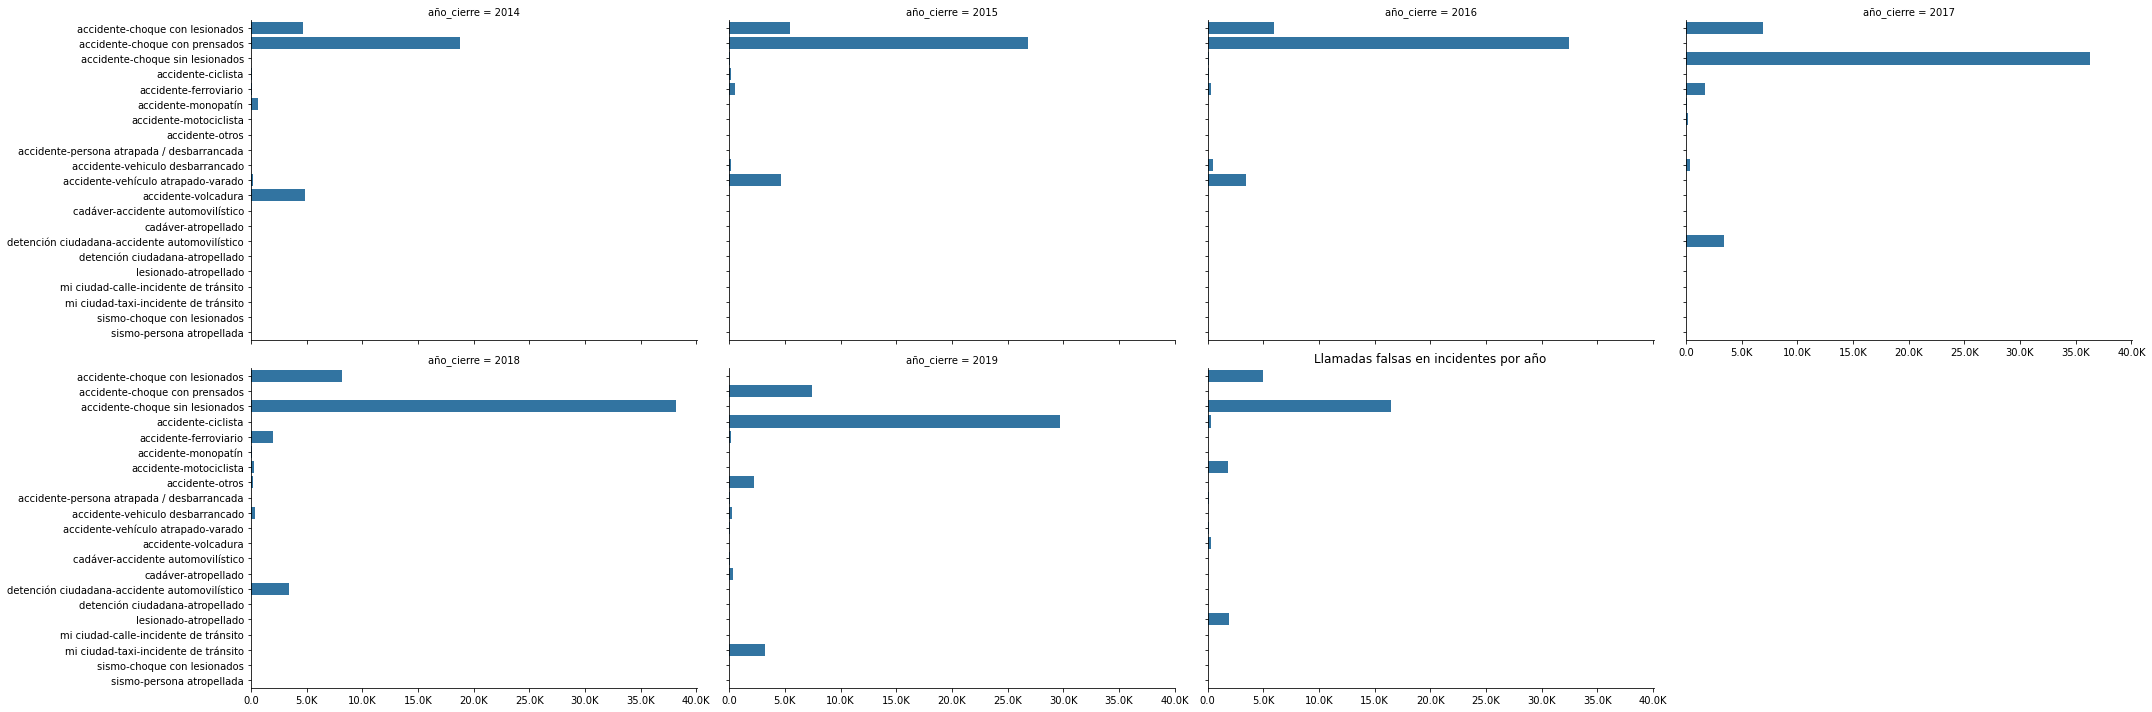

In [22]:
p = sns.FacetGrid(incidente_c4_falso_anio,
                  col="año_cierre",
                  col_wrap=4,
                  sharex=True,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="incidente_c4", x="label")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
p.tight_layout()
plt.title("Llamadas falsas en incidentes por año")
plt.show()

In [23]:
# tiempo de hora de creación a cierre



# 

3:46: W291 trailing whitespace
7:43: W291 trailing whitespace
11:2: W291 trailing whitespace


In [24]:
class_incidente_falso_anio = incidentes_viales_df.groupby(["clas_con_f_alarma", "incidente_c4"], 
                                                          as_index=False)

1:80: E501 line too long (96 > 79 characters)
1:97: W291 trailing whitespace


In [25]:
class_incidente_falso_anio = class_incidente_falso_anio.count()\
 .drop(columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
                'dia_semana', 'codigo_cierre', 'fecha_cierre',
                'año_cierre', 'mes_cierre', 'hora_cierre',
                'delegacion_inicio', 'latitud', 'longitud',
                'tipo_entrada', 'delegacion_cierre',
                'geopoint', 'mes', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

class_incidente_falso_anio

,clas_con_f_alarma,incidente_c4,total_llamadas
0,DELITO,Detención ciudadana-accidente automovilístico,3
1,DELITO,detención ciudadana-accidente automovilístico,151
2,DELITO,detención ciudadana-atropellado,698
3,EMERGENCIA,accidente-choque sin lesionados,752822
4,EMERGENCIA,accidente-ferroviario,53
5,EMERGENCIA,accidente-otros,2441
6,EMERGENCIA,accidente-persona atrapada / desbarrancada,5567
7,EMERGENCIA,accidente-vehiculo atrapado,1112
8,EMERGENCIA,accidente-vehiculo desbarrancado,487
9,EMERGENCIA,accidente-vehículo atrapado-varado,849


ValueError: too many values to unpack (expected 3)

In [26]:
class_incidente_falso = class_incidente_falso_anio.groupby(['clas_con_f_alarma'], as_index=False)\
 .sum()\
 .sort_values('total_llamadas', ascending=False)

class_incidente_falso

,clas_con_f_alarma,total_llamadas
1,EMERGENCIA,799037
3,URGENCIAS MEDICAS,572619
2,FALSA ALARMA,10630
0,DELITO,852


1:80: E501 line too long (98 > 79 characters)


[Text(0.5, 1.0, 'Llamadas falsas por clasificación'), Text(0, 0.5, '')]

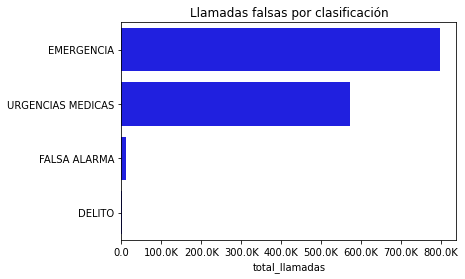

In [27]:
ax = sns.barplot(x="total_llamadas",
                 y="clas_con_f_alarma",
                 data=class_incidente_falso,
                 color="b")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por clasificación",
       ylabel="")

In [28]:
class_incidente_falso_anio = incidentes_viales_df.groupby(["clas_con_f_alarma", "año_cierre"],
                                                          as_index=False)

1:80: E501 line too long (94 > 79 characters)


In [29]:
class_incidente_falso_anio = class_incidente_falso_anio.count()\
 .drop(columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
                'dia_semana', 'codigo_cierre', 'fecha_cierre',
                'mes_cierre', 'hora_cierre',
                'delegacion_inicio', 'latitud', 'longitud',
                'tipo_entrada', 'delegacion_cierre',
                'geopoint', 'mes', 'label', 'incidente_c4'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

class_incidente_falso_anio

,clas_con_f_alarma,año_cierre,total_llamadas
0,DELITO,2014,83
1,DELITO,2015,81
2,DELITO,2016,80
3,DELITO,2017,129
4,DELITO,2018,185
5,DELITO,2019,159
6,DELITO,2020,135
7,EMERGENCIA,2014,106952
8,EMERGENCIA,2015,116703
9,EMERGENCIA,2016,118721


ValueError: too many values to unpack (expected 3)

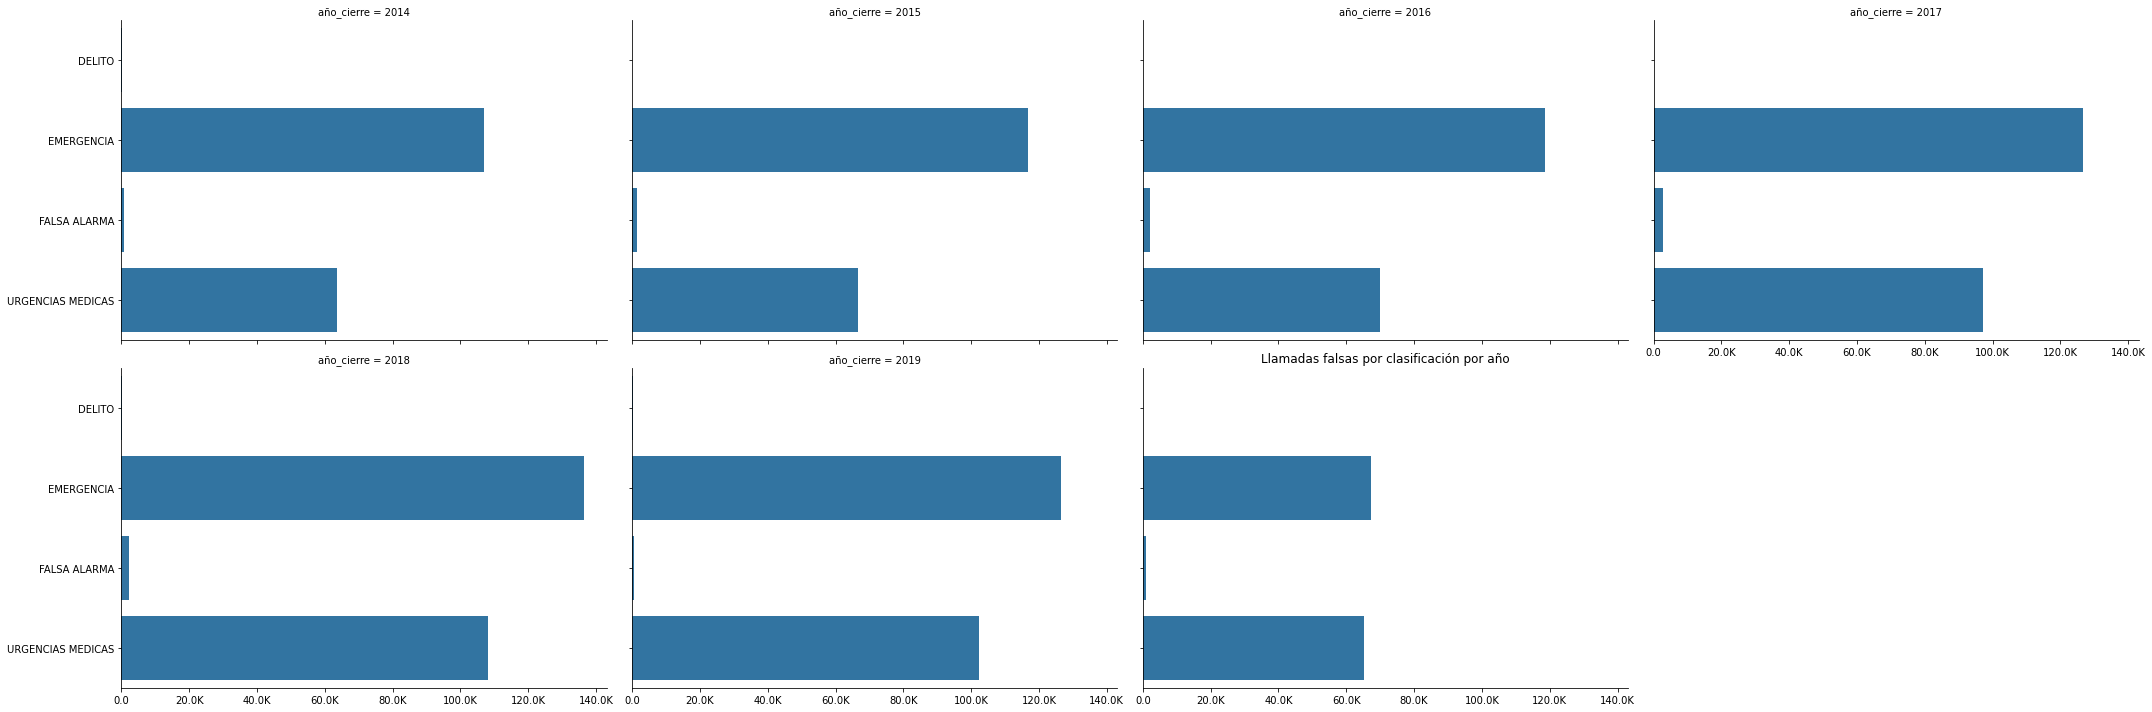

In [30]:
p = sns.FacetGrid(class_incidente_falso_anio,
                  col="año_cierre",
                  col_wrap=4,
                  sharex=True,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="clas_con_f_alarma", x="total_llamadas")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
p.tight_layout()
plt.title("Llamadas falsas por clasificación por año")
plt.show()

In [31]:
# Antes de hacer el drop de geopoint, asegurarse que estan bien en latitud y longitud.

1:80: E501 line too long (86 > 79 characters)


In [10]:
nan_geopoint = []
not_same_lat = []
not_same_long = []
for row in range(0, len(incidentes_viales_df)):
    if incidentes_viales_df['geopoint'][row] is np.nan:
        nan_geopoint.append(row)
    else:
        same_lat = float(incidentes_viales_df['geopoint'][row].split(",")[0]) == \
                   approx(incidentes_viales_df['latitud'][row])
        if not same_lat:
            not_same_lat.append(row)
            
        same_long = float(incidentes_viales_df['geopoint'][row].split(",")[1]) == \
                     approx(incidentes_viales_df['longitud'][row])
        if not same_long:
            not_same_long.append(row)

8:80: E501 line too long (82 > 79 characters)
9:9: E122 continuation line missing indentation or outdented
12:80: E501 line too long (83 > 79 characters)
13:9: E122 continuation line missing indentation or outdented


In [13]:
print(len(not_same_long))
print(len(not_same_lat))

0
0


In [31]:
# Como sí son iguales, entonces podemos eliminar la variable geopoint
incidentes_viales_df[incidentes_viales_df['latitud'].isnull() & (incidentes_viales_df['longitud'].notnull()) ]

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
284110,C5/181231/01210,31/12/2018,06:02:10,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,06:05:35,IZTAPALAPA,accidente-motociclista,NaN,-990.369,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,NaN,12
284125,C5/181231/05350,31/12/2018,15:42:11,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,15:50:06,CUAUHTEMOC,accidente-choque con lesionados,NaN,-991.692,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,NaN,12
436964,C5/181231/06210,31/12/2018,17:18:40,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,19:09:52,IZTACALCO,accidente-motociclista,NaN,-990.765,URGENCIAS MEDICAS,RADIO,IZTACALCO,NaN,12
436990,C5/181231/01068,31/12/2018,04:51:42,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,05:18:29,AZCAPOTZALCO,accidente-choque con lesionados,NaN,-991.764,URGENCIAS MEDICAS,LLAMADA DEL 911,AZCAPOTZALCO,NaN,12
437000,C5/181231/05354,31/12/2018,15:42:14,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,15:49:03,CUAUHTEMOC,accidente-choque con lesionados,NaN,-991.692,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,NaN,12
437042,C5/181231/05353,31/12/2018,15:41:59,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,15:49:27,CUAUHTEMOC,accidente-choque con lesionados,NaN,-991.692,URGENCIAS MEDICAS,LLAMADA DEL 911,CUAUHTEMOC,NaN,12
437075,C5/181231/00961,31/12/2018,04:08:37,Lunes,(D) El incidente reportado se registró en dos ...,31/12/2018,2018,Diciembre,04:18:48,AZCAPOTZALCO,accidente-choque con lesionados,NaN,-991.764,URGENCIAS MEDICAS,LLAMADA DEL 911,AZCAPOTZALCO,NaN,12
714449,C5/181231/05744,31/12/2018,16:22:20,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,18:10:39,IZTAPALAPA,accidente-choque sin lesionados,NaN,-990.495,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,NaN,12
714483,C5/181231/00956,31/12/2018,04:06:15,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,06:22:55,AZCAPOTZALCO,accidente-choque con lesionados,NaN,-991.764,URGENCIAS MEDICAS,LLAMADA DEL 911,AZCAPOTZALCO,NaN,12
714513,C5/181231/04311,31/12/2018,13:34:03,Lunes,(A) La unidad de atención a emergencias fue de...,31/12/2018,2018,Diciembre,16:01:07,TLAHUAC,accidente-choque sin lesionados,NaN,-989.595,EMERGENCIA,LLAMADA DEL 911,TLAHUAC,NaN,12


2:80: E501 line too long (110 > 79 characters)
2:109: E202 whitespace before ']'


Quise buscar si podíamos obtener latitud y longitud de Geopoint en dado caso de que estuvieran nulos, pero no existe el caso 

# Se hace drop a GEOPOINT

In [32]:
incidentes_viales_df = incidentes_viales_df.drop('geopoint', axis=1)

1:66: E251 unexpected spaces around keyword / parameter equals
1:68: E251 unexpected spaces around keyword / parameter equals


## Mes

In [38]:
# Mes contra mes_cierre antes de hacer drop

# Diccionario
mes = {
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
}

In [45]:
print(mes['Diciembre'])

In [ ]:
not_same = []
for row in range(0, len(incidentes_viales_df)):
    same = incidentes_viales_df['mes'][row] == mes[incidentes_viales_df['mes_cierre'][row]]
    if not same:
        not_same.append(row)
len(not_same)

### confirmamos que mes y mes_cierre es lo mismo y que se puede borrar cualquiera de los dos

## Delegación inicio vs Delegación cierre

In [7]:
(incidentes_viales_df['delegacion_inicio'] != incidentes_viales_df['delegacion_cierre']).sum()

43962

1:80: E501 line too long (94 > 79 characters)


In [20]:
incidentes_viales_df[incidentes_viales_df['delegacion_inicio'] != incidentes_viales_df['delegacion_cierre']]

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,label
9,C4/160124/00010,23/01/2016,23:58:37,Sábado,A,24/01/2016,2016,Enero,00:21:10,MIGUEL HIDALGO,accidente-choque con lesionados,19.392400,-99.239100,URGENCIAS MEDICAS,LLAMADA DEL 066,ALVARO OBREGON,"19.3924,-99.2391",1,0
22,C4/160124/05001,24/01/2016,20:12:53,Domingo,A,24/01/2016,2016,Enero,21:45:50,COYOACAN,accidente-choque con lesionados,19.301830,-99.194970,URGENCIAS MEDICAS,LLAMADA DEL 066,TLALPAN,"19.30183002,-99.19496988",1,0
38,C4/160124/03111,24/01/2016,13:52:09,Domingo,D,24/01/2016,2016,Enero,14:05:33,IZTACALCO,accidente-choque con lesionados,19.385190,-99.069460,URGENCIAS MEDICAS,LLAMADA DEL 066,IZTAPALAPA,"19.38519,-99.06945984",1,0
84,C4/160124/01481,24/01/2016,05:03:39,Domingo,A,24/01/2016,2016,Enero,05:40:45,MIGUEL HIDALGO,accidente-choque sin lesionados,19.400600,-99.170380,EMERGENCIA,LLAMADA DEL 066,CUAUHTEMOC,"19.40059998,-99.17038008",1,0
115,C4/160123/05757,23/01/2016,22:40:55,Sábado,A,24/01/2016,2016,Enero,05:50:51,CUAUHTEMOC,accidente-choque sin lesionados,19.441590,-99.123180,EMERGENCIA,LLAMADA DEL 066,VENUSTIANO CARRANZA,"19.44159003,-99.12318012",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382993,C5/201021/05705,21/10/2020,23:08:17,Miércoles,D,21/10/2020,2020,Octubre,23:29:59,CUAJIMALPA,accidente-choque con lesionados,19.362950,-99.265310,URGENCIAS MEDICAS,LLAMADA DEL 911,ALVARO OBREGON,"19.36295001,-99.26530992",10,0
1383042,C5/201021/03577,21/10/2020,16:41:51,Miércoles,D,21/10/2020,2020,Octubre,16:52:45,XOCHIMILCO,accidente-choque con lesionados,19.224730,-99.152252,URGENCIAS MEDICAS,LLAMADA DEL 911,TLALPAN,"19.22473,-99.152252",10,0
1383063,C5/201021/00119,21/10/2020,00:34:17,Miércoles,A,21/10/2020,2020,Octubre,01:49:57,BENITO JUAREZ,accidente-choque sin lesionados,19.383960,-99.191230,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,"19.38395997,-99.19122984",10,0
1383073,C5/201021/05762,21/10/2020,23:20:34,Miércoles,D,21/10/2020,2020,Octubre,23:25:04,CUAJIMALPA,accidente-choque con lesionados,19.362950,-99.265310,URGENCIAS MEDICAS,LLAMADA DEL 911,ALVARO OBREGON,"19.36295001,-99.26530992",10,0


1:80: E501 line too long (108 > 79 characters)


# tipo_entrada (en proporción)

Tipo de entrada: 
    
    + Aplicativo? Es lo mismo que App
    + ZELLO parece ser un Walkie Talkie

In [ ]:
tipo_entrada_total = incidentes_viales_df.groupby(["tipo_entrada"], as_index=True).count()

tipo_entrada_total = tipo_entrada_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'delegacion_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'año_cierre', 'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

#tipo_entrada_total

In [89]:
tipo_entrada = incidentes_viales_df.groupby(["tipo_entrada", "label"], as_index=False).count()

In [ ]:
tipo_entrada_falsa = tipo_entrada.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'delegacion_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'año_cierre', 'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

tipo_entrada_falsa = tipo_entrada_falsa.set_index("tipo_entrada")
#tipo_entrada_falsa

In [91]:
tipo_entrada_falsa['prop'] = tipo_entrada_falsa['num_llamadas']/tipo_entrada_total['total_llamadas']*100
tipo_entrada_falsa = tipo_entrada_falsa[tipo_entrada_falsa['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()
tipo_entrada_falsa

,tipo_entrada,label,num_llamadas,prop
0,REDES,1,1963,41.792634
1,APLICATIVOS,1,30,37.037037
2,LLAMADA DEL 066,1,106624,23.007475
3,LLAMADA DEL 911,1,163284,22.085133
4,ZELLO,1,1290,19.996900
5,LLAMADA APP911,1,1889,19.919857
6,BOTÓN DE AUXILIO,1,3795,4.826402
7,RADIO,1,3370,4.334461
8,CÁMARA,1,58,1.770452


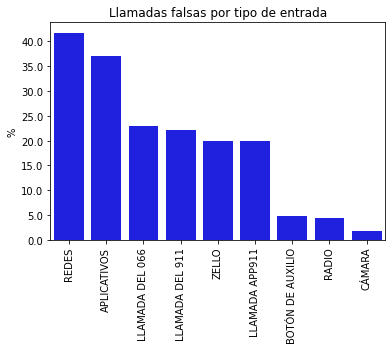

In [93]:
ax = sns.barplot(x="tipo_entrada",
                 y="prop",
                 data=tipo_entrada_falsa,
                 color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por tipo de entrada",
       xlabel="",
       ylabel="%")
plt.show()

## Por año

In [ ]:
tipo_entrada_total = incidentes_viales_df.groupby(["tipo_entrada", "año_cierre"], as_index=True).count()

tipo_entrada_total = tipo_entrada_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'delegacion_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

# tipo_entrada_total

In [103]:
tipo_entrada = incidentes_viales_df.groupby(["tipo_entrada", "año_cierre", "label"], as_index=False).count()

In [ ]:
tipo_entrada_falsa = tipo_entrada.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'delegacion_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

tipo_entrada_falsa = tipo_entrada_falsa.set_index(["tipo_entrada", "año_cierre"])
# tipo_entrada_falsa

In [105]:
tipo_entrada_falsa['total'] = tipo_entrada_total['total_llamadas']
tipo_entrada_falsa['prop'] = tipo_entrada_falsa['num_llamadas']/tipo_entrada_total['total_llamadas']*100

tipo_entrada_falsa = tipo_entrada_falsa[tipo_entrada_falsa['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()

tipo_entrada_falsa

,tipo_entrada,año_cierre,label,num_llamadas,total,prop
0,REDES,2018,1,484,1033,46.853824
1,REDES,2015,1,17,37,45.945946
2,REDES,2020,1,327,752,43.484043
3,REDES,2016,1,375,873,42.955326
4,REDES,2019,1,385,969,39.731682
5,APLICATIVOS,2020,1,30,81,37.037037
6,REDES,2017,1,375,1033,36.302033
7,LLAMADA APP911,2020,1,214,779,27.471117
8,LLAMADA DEL 066,2016,1,41550,164659,25.233968
9,LLAMADA DEL 066,2015,1,36744,156516,23.476194


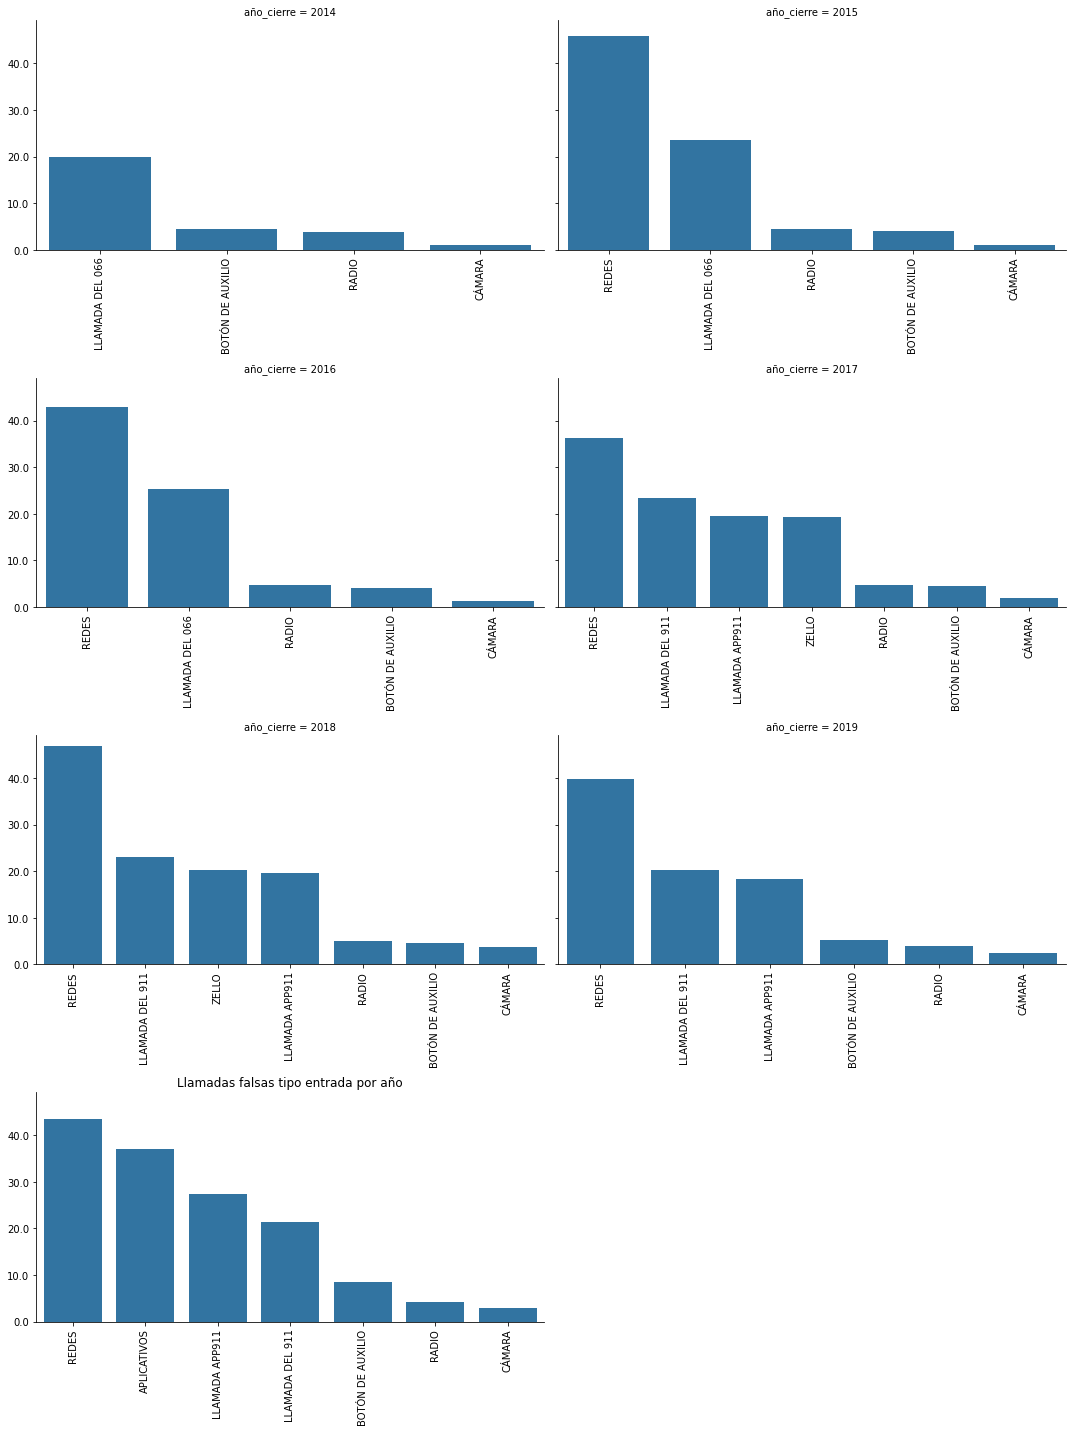

In [112]:
p = sns.FacetGrid(tipo_entrada_falsa,
                  col="año_cierre",
                  col_wrap=2,
                  sharex=False,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="prop", x="tipo_entrada")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
p.tight_layout()
plt.title("Llamadas falsas tipo entrada por año")
plt.show()

## Por delegación

In [160]:
tipo_entrada_total = incidentes_viales_df.groupby(["tipo_entrada", "delegacion_cierre"], as_index=True).count()

tipo_entrada_total = tipo_entrada_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'año_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

# tipo_entrada_total

In [161]:
tipo_entrada = incidentes_viales_df.groupby(["tipo_entrada", "delegacion_cierre", "label"], 
                                            as_index=False).count()

In [162]:
tipo_entrada_falsa = tipo_entrada.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'año_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

tipo_entrada_falsa = tipo_entrada_falsa.set_index(["tipo_entrada", "delegacion_cierre"])
# tipo_entrada_falsa

In [163]:
tipo_entrada_falsa['total'] = tipo_entrada_total['total_llamadas']
tipo_entrada_falsa['prop'] = tipo_entrada_falsa['num_llamadas']/tipo_entrada_total['total_llamadas']*100

In [164]:
# TODAS LAS LLAMADAS POR DELEGACION

tipo_entrada_falsa_gen = incidentes_viales_df.groupby(["delegacion_cierre"], as_index=True).count().drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'año_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'codigo_cierre', 'tipo_entrada','label'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

In [166]:
tipo_entrada_falsa_gen

,num_llamadas
delegacion_cierre,
ALVARO OBREGON,104073
AZCAPOTZALCO,59776
BENITO JUAREZ,103602
COYOACAN,107251
CUAJIMALPA,26268
CUAUHTEMOC,141781
GUSTAVO A. MADERO,147582
IZTACALCO,59183
IZTAPALAPA,225202


In [176]:
# TODAS LAS LLAMADAS FALSAS
delegacion_falsas = tipo_entrada_falsa[tipo_entrada_falsa['label'] == 1].drop(['total','prop'], axis=1)\
 .reset_index()

In [181]:
delegacion_falsas = delegacion_falsas.groupby('delegacion_cierre', as_index=True).sum().drop('label', axis=1)

In [190]:
delegacion_falsas['total'] = tipo_entrada_falsa_gen['num_llamadas']
delegacion_falsas['prop'] = delegacion_falsas['num_llamadas'] / delegacion_falsas['total'] * 100
delegacion_falsas['total'].sum() - len(incidentes_viales_df) # Por qué hacen falta 140 llamadas?
# Hacen falta porque tenemos 140 valores nulos
delegacion_falsas = delegacion_falsas.reset_index().sort_values('prop', ascending=False)
delegacion_falsas

,delegacion_cierre,num_llamadas,total,prop
4,CUAJIMALPA,8307,26268,31.624029
9,MAGDALENA CONTRERAS,5575,19703,28.295183
13,TLALPAN,22800,92122,24.749788
15,XOCHIMILCO,11997,50642,23.689823
11,MILPA ALTA,1673,7094,23.583310
12,TLAHUAC,7789,33148,23.497647
8,IZTAPALAPA,50804,225202,22.559302
0,ALVARO OBREGON,22766,104073,21.875030
3,COYOACAN,22770,107251,21.230571
10,MIGUEL HIDALGO,22073,113910,19.377579


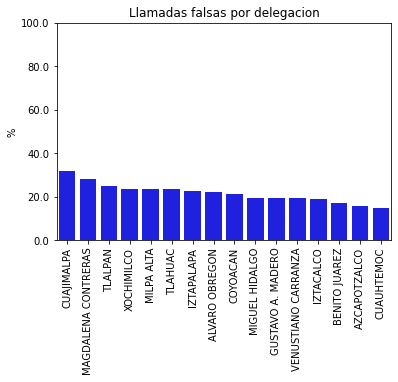

In [193]:
ax = sns.barplot(x="delegacion_cierre",
                 y="prop",
                 data=delegacion_falsas,
                 color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por delegacion",
       xlabel="",
       ylabel="%")
ax.set_ylim(0, 100)
plt.show()

In [194]:
tipo_entrada_falsas = tipo_entrada_falsa[tipo_entrada_falsa['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()

tipo_entrada_falsas

,tipo_entrada,delegacion_cierre,label,num_llamadas,total,prop
0,APLICATIVOS,ALVARO OBREGON,1,1,1,100.000000
1,APLICATIVOS,CUAJIMALPA,1,7,8,87.500000
2,APLICATIVOS,BENITO JUAREZ,1,2,3,66.666667
3,ZELLO,MILPA ALTA,1,6,10,60.000000
4,REDES,IZTACALCO,1,94,185,50.810811
...,...,...,...,...,...,...
130,CÁMARA,BENITO JUAREZ,1,3,294,1.020408
131,CÁMARA,AZCAPOTZALCO,1,1,102,0.980392
132,CÁMARA,CUAUHTEMOC,1,4,440,0.909091
133,CÁMARA,IZTACALCO,1,2,222,0.900901


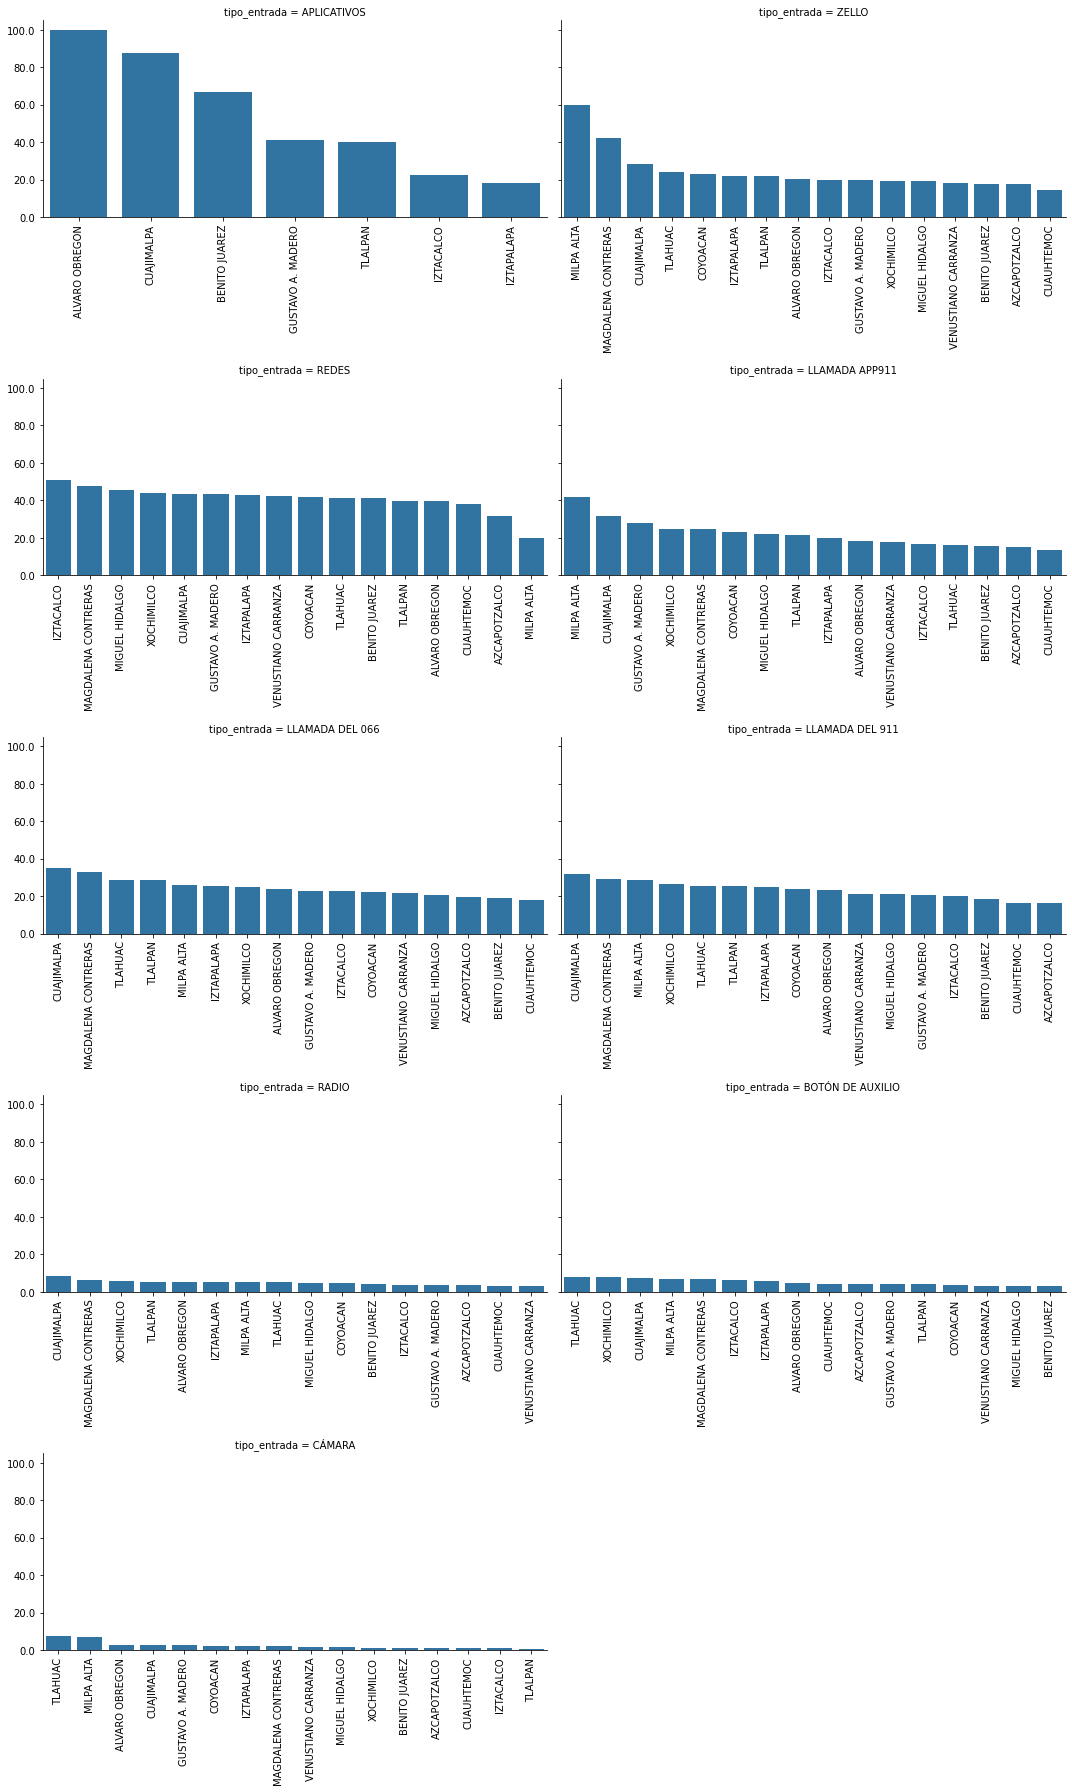

In [196]:
p = sns.FacetGrid(tipo_entrada_falsas,
                  col="tipo_entrada",
                  col_wrap=2,
                  sharex=False,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="prop", x="delegacion_cierre")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
p.tight_layout()
plt.show()

# incidente_c4 

In [197]:
incidente_total = incidentes_viales_df.groupby(["incidente_c4"], as_index=True).count()

incidente_total = incidente_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'delegacion_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'año_cierre', 'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

incidente_total

,total_llamadas
incidente_c4,
Detención ciudadana-accidente automovilístico,3
accidente-choque con lesionados,315031
accidente-choque con prensados,2334
accidente-choque sin lesionados,760506
accidente-ciclista,2718
accidente-ferroviario,55
accidente-monopatín,31
accidente-motociclista,55646
accidente-otros,2465


In [198]:
incidente = incidentes_viales_df.groupby(["incidente_c4", "label"], as_index=False).count()

In [199]:
incidente_falso = incidente.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'delegacion_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'año_cierre', 'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

incidente_falso = incidente_falso.set_index("incidente_c4")
incidente_falso

,label,num_llamadas
incidente_c4,,
Detención ciudadana-accidente automovilístico,0,3
accidente-choque con lesionados,0,271353
accidente-choque con lesionados,1,43678
accidente-choque con prensados,0,2175
accidente-choque con prensados,1,159
accidente-choque sin lesionados,0,561812
accidente-choque sin lesionados,1,198694
accidente-ciclista,0,2231
accidente-ciclista,1,487


In [200]:
incidente_falso['prop'] = incidente_falso['num_llamadas']/incidente_total['total_llamadas']*100
incidente_falso = incidente_falso[incidente_falso['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()
incidente_falso

,incidente_c4,label,num_llamadas,prop
0,mi ciudad-taxi-incidente de tránsito,1,1,100.000000
1,mi ciudad-calle-incidente de tránsito,1,28,50.909091
2,accidente-vehiculo atrapado,1,314,28.010705
3,accidente-vehículo atrapado-varado,1,232,27.230047
4,accidente-choque sin lesionados,1,198694,26.126553
5,detención ciudadana-accidente automovilístico,1,39,25.490196
6,accidente-persona atrapada / desbarrancada,1,1197,21.348315
7,accidente-monopatín,1,6,19.354839
8,accidente-otros,1,461,18.701826
9,detención ciudadana-atropellado,1,131,18.660969


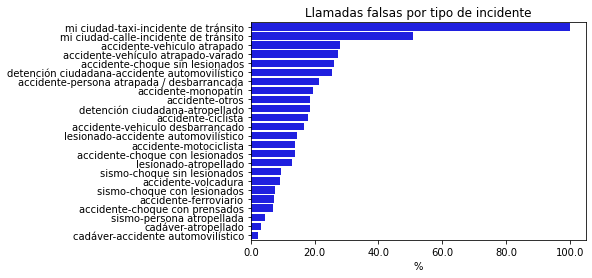

In [204]:
ax = sns.barplot(x="prop",
                 y="incidente_c4",
                 data=incidente_falso,
                 color="b")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por tipo de incidente",
       xlabel="%",
       ylabel="")
plt.show()

## Por año

In [205]:
incidente_total = incidentes_viales_df.groupby(["incidente_c4", "año_cierre"], as_index=True).count()

incidente_total = incidente_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'delegacion_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

# incidente_total

In [206]:
incidente = incidentes_viales_df.groupby(["incidente_c4", "año_cierre", "label"], as_index=False).count()

In [207]:
incidente_falso = incidente.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'delegacion_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

incidente_falso = incidente_falso.set_index(["incidente_c4", "año_cierre"])
# tipo_entrada_falsa

In [208]:
incidente_falso['total'] = incidente_total['total_llamadas']
incidente_falso['prop'] = incidente_falso['num_llamadas']/incidente_falso['total']*100

incidente_falso = incidente_falso[incidente_falso['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()

incidente_falso

,incidente_c4,año_cierre,label,num_llamadas,total,prop
0,mi ciudad-taxi-incidente de tránsito,2020,1,1,1,100.000000
1,mi ciudad-calle-incidente de tránsito,2020,1,28,55,50.909091
2,detención ciudadana-accidente automovilístico,2016,1,4,10,40.000000
3,accidente-ferroviario,2017,1,4,11,36.363636
4,detención ciudadana-accidente automovilístico,2017,1,8,26,30.769231
...,...,...,...,...,...,...
96,cadáver-accidente automovilístico,2017,1,3,166,1.807229
97,cadáver-accidente automovilístico,2018,1,2,121,1.652893
98,cadáver-atropellado,2016,1,5,304,1.644737
99,cadáver-accidente automovilístico,2016,1,2,159,1.257862


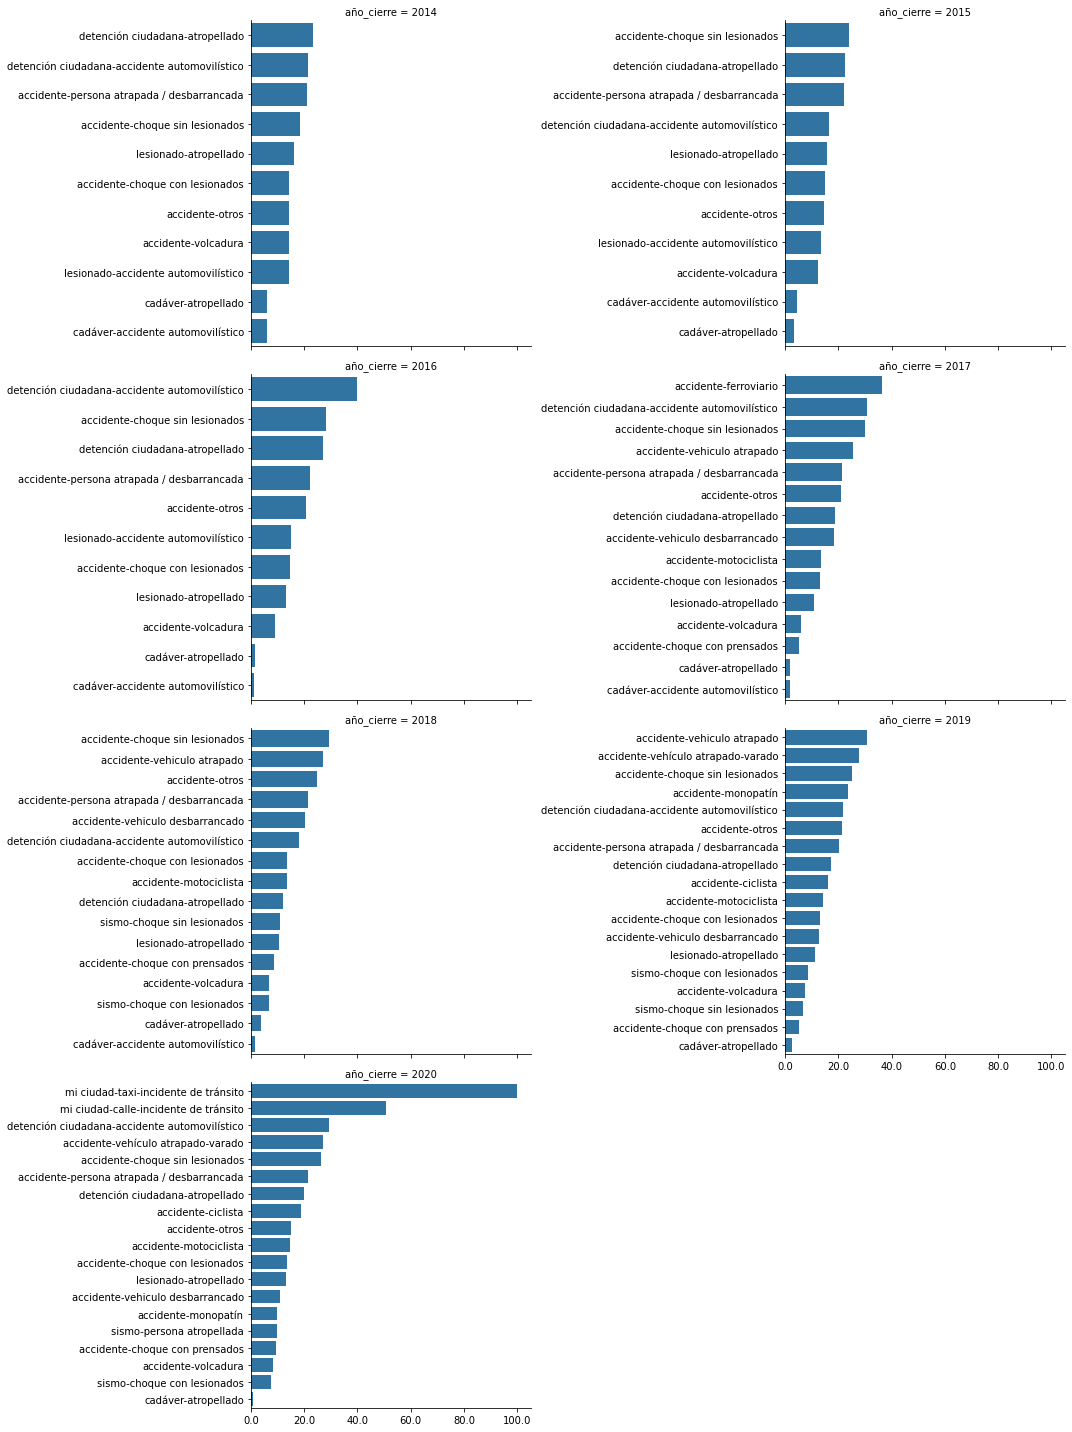

In [209]:
p = sns.FacetGrid(incidente_falso,
                  col="año_cierre",
                  col_wrap=2,
                  sharex=True,
                  sharey=False,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="incidente_c4", x="prop")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
        
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
p.tight_layout()
plt.show()

## Por delegación

In [210]:
incidente_total = incidentes_viales_df.groupby(["incidente_c4", "delegacion_cierre"], as_index=True).count()

incidente_total = incidente_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'año_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

# tipo_entrada_total

In [211]:
incidente = incidentes_viales_df.groupby(["incidente_c4", "delegacion_cierre", "label"], 
                                            as_index=False).count()

In [212]:
incidente_falso = incidente.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'año_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

incidente_falso = incidente_falso.set_index(["incidente_c4", "delegacion_cierre"])
# tipo_entrada_falsa

In [215]:
incidente_falso['total'] = incidente_total['total_llamadas']
incidente_falso['prop'] = incidente_falso['num_llamadas']/incidente_falso['total']*100

In [216]:
# TODAS LAS LLAMADAS POR DELEGACION

llamadas_delegacion = incidentes_viales_df.groupby(["delegacion_cierre"], as_index=True).count().drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'año_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'codigo_cierre', 'tipo_entrada','label'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

In [218]:
# TODAS LAS LLAMADAS FALSAS
delegacion_falsas = incidente_falso[incidente_falso['label'] == 1].drop(['total','prop'], axis=1)\
 .reset_index()

In [219]:
delegacion_falsas = delegacion_falsas.groupby('delegacion_cierre', as_index=True).sum().drop('label', axis=1)

In [220]:
delegacion_falsas['total'] = llamadas_delegacion['num_llamadas']
delegacion_falsas['prop'] = delegacion_falsas['num_llamadas'] / delegacion_falsas['total'] * 100
delegacion_falsas['total'].sum() - len(incidentes_viales_df) # Por qué hacen falta 140 llamadas?
# Hacen falta porque tenemos 140 valores nulos
delegacion_falsas = delegacion_falsas.reset_index().sort_values('prop', ascending=False)
delegacion_falsas

,delegacion_cierre,num_llamadas,total,prop
4,CUAJIMALPA,8307,26268,31.624029
9,MAGDALENA CONTRERAS,5575,19703,28.295183
13,TLALPAN,22800,92122,24.749788
15,XOCHIMILCO,11997,50642,23.689823
11,MILPA ALTA,1673,7094,23.583310
12,TLAHUAC,7789,33148,23.497647
8,IZTAPALAPA,50804,225202,22.559302
0,ALVARO OBREGON,22766,104073,21.875030
3,COYOACAN,22770,107251,21.230571
10,MIGUEL HIDALGO,22073,113910,19.377579


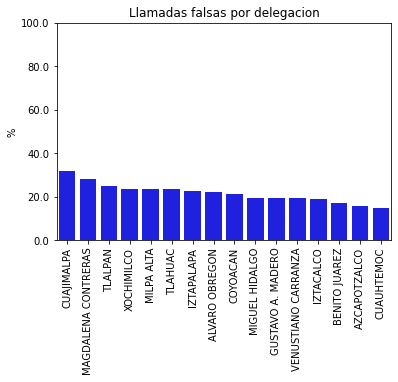

In [221]:
ax = sns.barplot(x="delegacion_cierre",
                 y="prop",
                 data=delegacion_falsas,
                 color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por delegacion",
       xlabel="",
       ylabel="%")
ax.set_ylim(0, 100)
plt.show()

In [222]:
incidente_falso = incidente_falso[incidente_falso['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()

incidente_falso

,incidente_c4,delegacion_cierre,label,num_llamadas,total,prop
0,mi ciudad-calle-incidente de tránsito,ALVARO OBREGON,1,1,1,100.000000
1,accidente-vehiculo desbarrancado,VENUSTIANO CARRANZA,1,1,1,100.000000
2,accidente-ferroviario,IZTAPALAPA,1,1,1,100.000000
3,mi ciudad-calle-incidente de tránsito,TLALPAN,1,2,2,100.000000
4,mi ciudad-taxi-incidente de tránsito,IZTAPALAPA,1,1,1,100.000000
...,...,...,...,...,...,...
296,cadáver-atropellado,VENUSTIANO CARRANZA,1,3,167,1.796407
297,cadáver-accidente automovilístico,IZTAPALAPA,1,4,224,1.785714
298,cadáver-accidente automovilístico,COYOACAN,1,1,64,1.562500
299,cadáver-accidente automovilístico,TLALPAN,1,1,114,0.877193


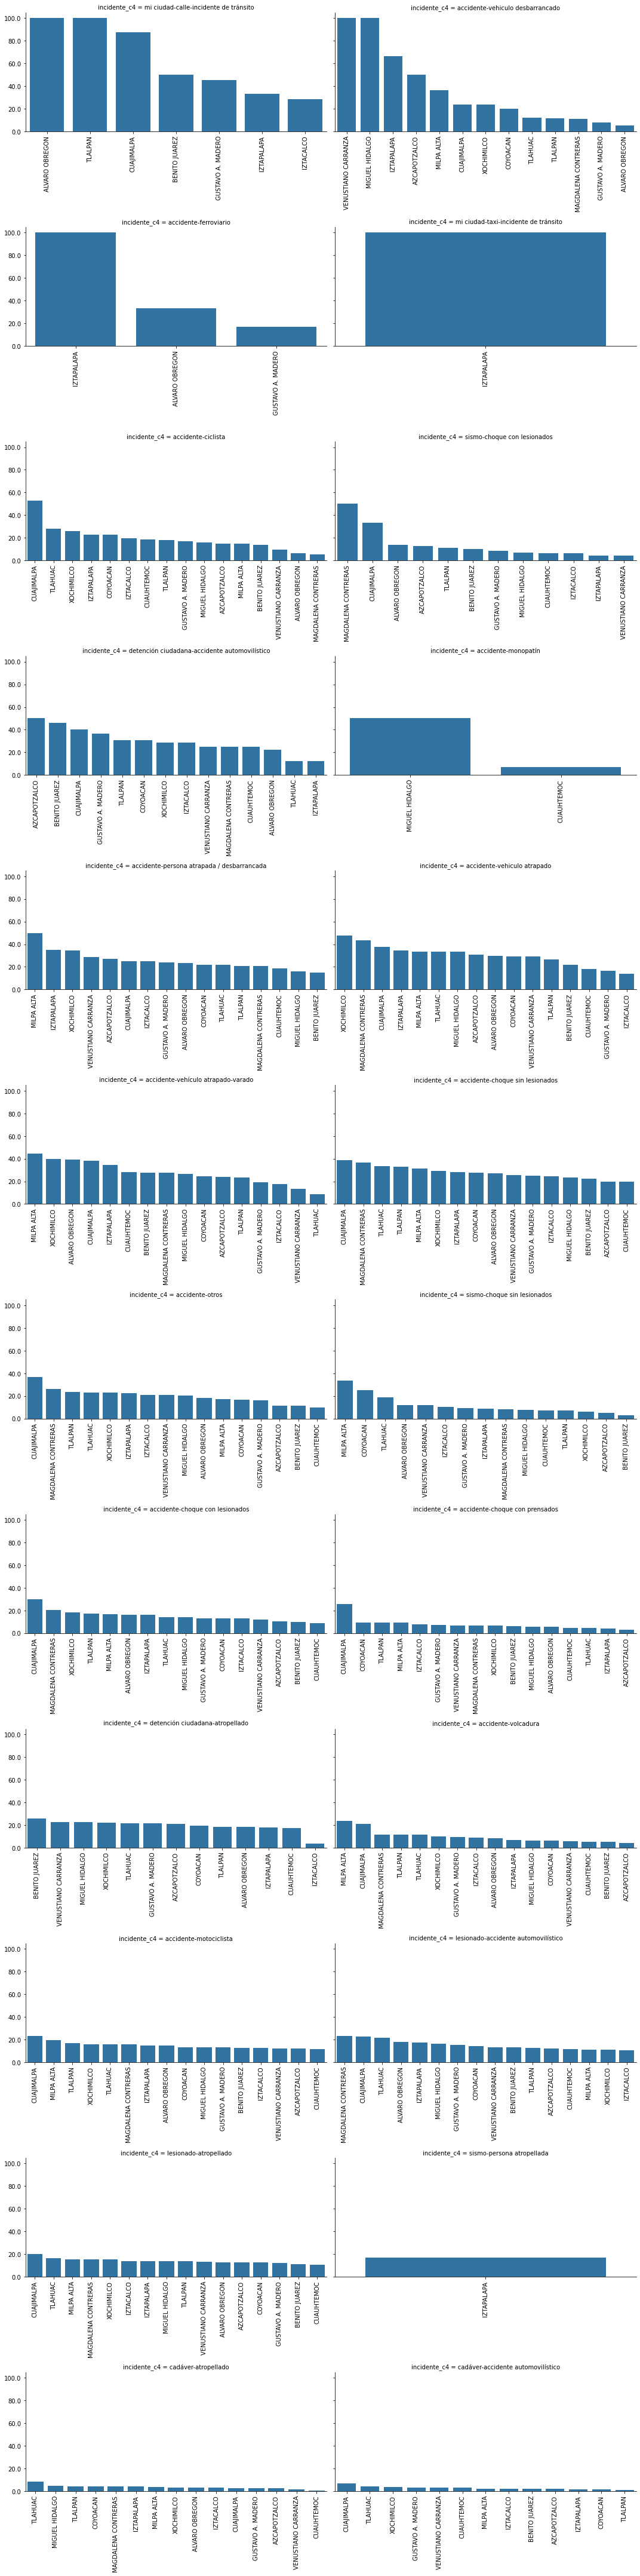

In [223]:
p = sns.FacetGrid(incidente_falso,
                  col="incidente_c4",
                  col_wrap=2,
                  sharex=False,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="prop", x="delegacion_cierre")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
p.tight_layout()
plt.show()

# clas_con_f_alarma

In [226]:
clas_con_f_alarma_total = incidentes_viales_df.groupby(["clas_con_f_alarma"], as_index=True).count()

clas_con_f_alarma_total = clas_con_f_alarma_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'incidente_c4', 'delegacion_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'año_cierre', 'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

clas_con_f_alarma_total

,total_llamadas
clas_con_f_alarma,
DELITO,852
EMERGENCIA,799037
FALSA ALARMA,10630
URGENCIAS MEDICAS,572619


In [227]:
clas = incidentes_viales_df.groupby(["clas_con_f_alarma", "label"], as_index=False).count()

In [228]:
clas_falsa = clas.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'incidente_c4', 'delegacion_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'año_cierre', 'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

clas_falsa = clas_falsa.set_index("clas_con_f_alarma")
clas_falsa

,label,num_llamadas
clas_con_f_alarma,,
DELITO,0,688
DELITO,1,164
EMERGENCIA,0,602852
EMERGENCIA,1,196185
FALSA ALARMA,0,4
FALSA ALARMA,1,10626
URGENCIAS MEDICAS,0,497291
URGENCIAS MEDICAS,1,75328


In [229]:
clas_falsa['prop'] = clas_falsa['num_llamadas']/clas_con_f_alarma_total['total_llamadas']*100
clas_falsa = clas_falsa[clas_falsa['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()
clas_falsa

,clas_con_f_alarma,label,num_llamadas,prop
0,FALSA ALARMA,1,10626,99.962371
1,EMERGENCIA,1,196185,24.552680
2,DELITO,1,164,19.248826
3,URGENCIAS MEDICAS,1,75328,13.154995


/home/carotova/.pyenv/versions/3.7.4/envs/accidentes-viales/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


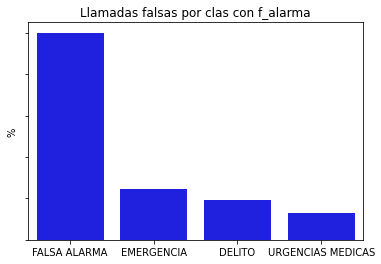

In [232]:
ax = sns.barplot(x="clas_con_f_alarma",
                 y="prop",
                 data=clas_falsa,
                 color="b")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por clas con f_alarma",
       xlabel="",
       ylabel="%")
plt.show()

## Por año

In [233]:
clas_total = incidentes_viales_df.groupby(["clas_con_f_alarma", "año_cierre"], as_index=True).count()

clas_total = clas_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'incidente_c4', 'delegacion_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

# clas_total

In [234]:
clas = incidentes_viales_df.groupby(["clas_con_f_alarma", "año_cierre", "label"], as_index=False).count()

In [235]:
clas_falsa = clas.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'incidente_c4', 'delegacion_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

clas_falsa = clas_falsa.set_index(["clas_con_f_alarma", "año_cierre"])
# clas_falsa

In [236]:
clas_falsa['total'] = clas_total['total_llamadas']
clas_falsa['prop'] = clas_falsa['num_llamadas']/clas_falsa['total']*100

clas_falsa = clas_falsa[clas_falsa['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()

clas_falsa

,clas_con_f_alarma,año_cierre,label,num_llamadas,total,prop
0,FALSA ALARMA,2014,1,735,735,100.000000
1,FALSA ALARMA,2020,1,914,914,100.000000
2,FALSA ALARMA,2019,1,428,428,100.000000
3,FALSA ALARMA,2018,1,2098,2098,100.000000
4,FALSA ALARMA,2016,1,2203,2203,100.000000
5,FALSA ALARMA,2015,1,1507,1507,100.000000
6,FALSA ALARMA,2017,1,2741,2745,99.854281
7,DELITO,2016,1,23,80,28.750000
8,EMERGENCIA,2018,1,37601,136317,27.583500
9,EMERGENCIA,2017,1,34739,126565,27.447557


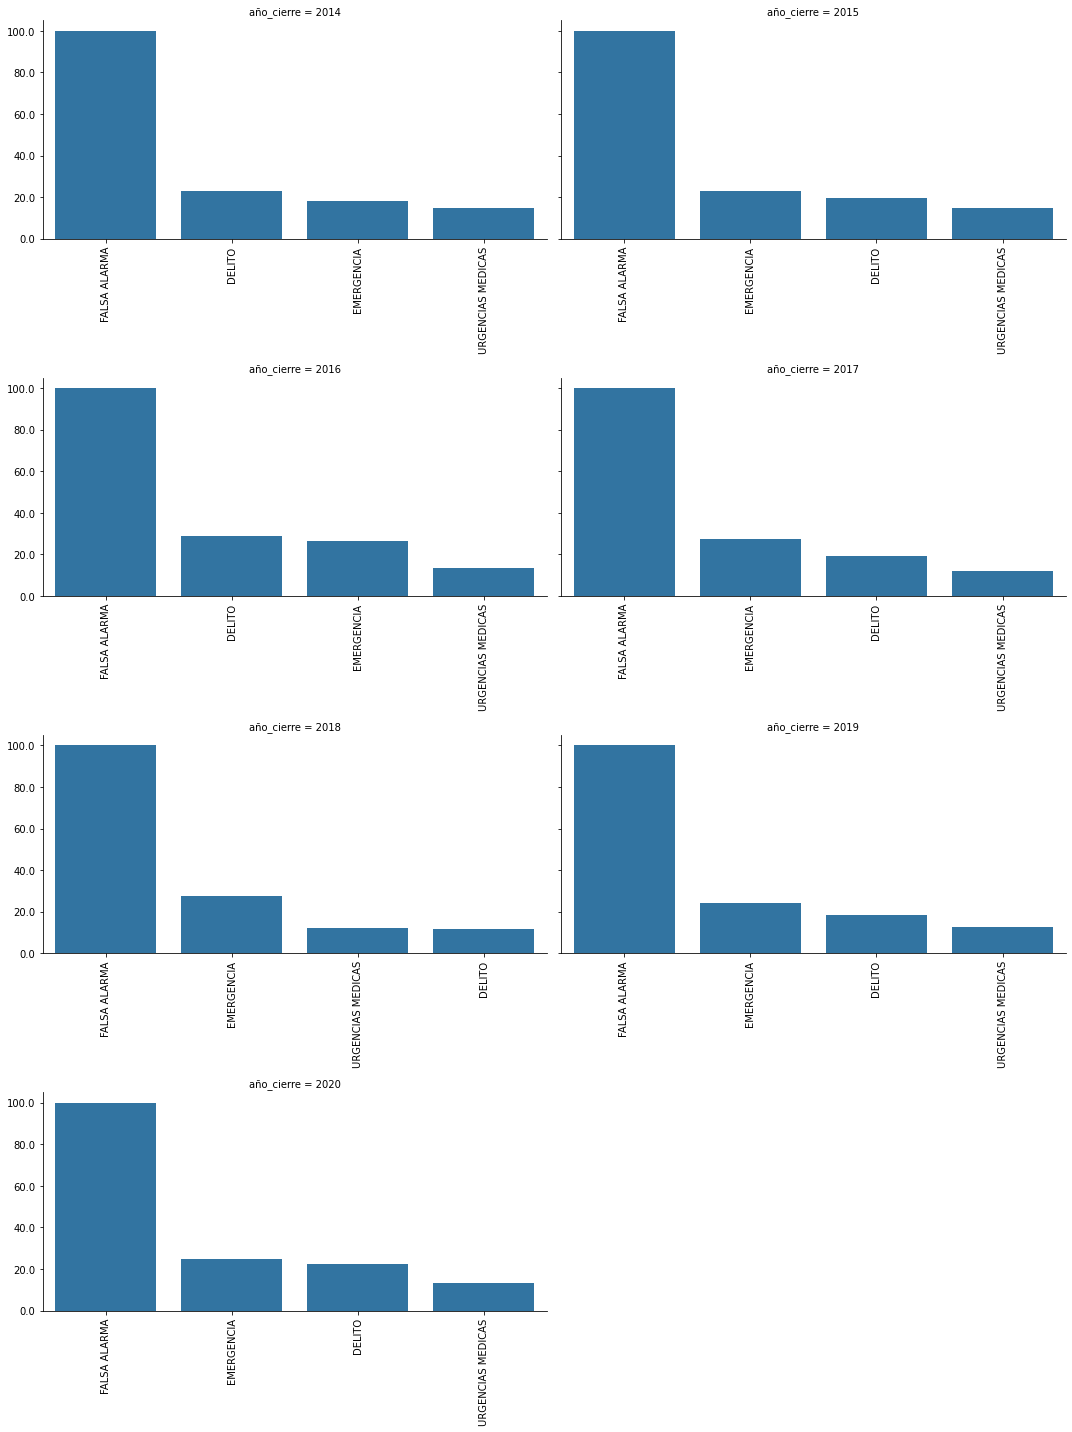

In [238]:
p = sns.FacetGrid(clas_falsa,
                  col="año_cierre",
                  col_wrap=2,
                  sharex=False,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="prop", x="clas_con_f_alarma")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
p.tight_layout()
plt.show()

## Por delegación

In [239]:
clas_total = incidentes_viales_df.groupby(["clas_con_f_alarma", "delegacion_cierre"], as_index=True)\
 .count()

clas_total = clas_total.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'incidente_c4', 'año_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'codigo_cierre', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

# clas_total

In [240]:
clas = incidentes_viales_df.groupby(["clas_con_f_alarma", "delegacion_cierre", "label"], 
                                            as_index=False).count()

In [241]:
clas_falsa = clas.drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'incidente_c4', 'año_cierre',
             'geopoint', 'mes', 'tipo_entrada',
             'codigo_cierre'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

clas_falsa = clas_falsa.set_index(["clas_con_f_alarma", "delegacion_cierre"])
# clas_falsa

In [242]:
clas_falsa['total'] = clas_total['total_llamadas']
clas_falsa['prop'] = clas_falsa['num_llamadas']/clas_falsa['total']*100

In [216]:
# TODAS LAS LLAMADAS POR DELEGACION

llamadas_delegacion = incidentes_viales_df.groupby(["delegacion_cierre"], as_index=True).count().drop(
    columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
             'dia_semana', 'fecha_cierre',
             'mes_cierre', 'hora_cierre',
             'delegacion_inicio', 'latitud', 'longitud',
             'clas_con_f_alarma', 'año_cierre',
             'geopoint', 'mes', 'incidente_c4',
             'codigo_cierre', 'tipo_entrada','label'], axis=1)\
 .rename(columns={'folio':'num_llamadas'})

In [243]:
# TODAS LAS LLAMADAS FALSAS
delegacion_falsas = clas_falsa[clas_falsa['label'] == 1].drop(['total','prop'], axis=1)\
 .reset_index()

In [244]:
delegacion_falsas = delegacion_falsas.groupby('delegacion_cierre', as_index=True).sum().drop('label', axis=1)

In [245]:
delegacion_falsas['total'] = llamadas_delegacion['num_llamadas']
delegacion_falsas['prop'] = delegacion_falsas['num_llamadas'] / delegacion_falsas['total'] * 100
delegacion_falsas['total'].sum() - len(incidentes_viales_df) # Por qué hacen falta 140 llamadas?
# Hacen falta porque tenemos 140 valores nulos
delegacion_falsas = delegacion_falsas.reset_index().sort_values('prop', ascending=False)
delegacion_falsas

,delegacion_cierre,num_llamadas,total,prop
4,CUAJIMALPA,8307,26268,31.624029
9,MAGDALENA CONTRERAS,5575,19703,28.295183
13,TLALPAN,22800,92122,24.749788
15,XOCHIMILCO,11997,50642,23.689823
11,MILPA ALTA,1673,7094,23.583310
12,TLAHUAC,7789,33148,23.497647
8,IZTAPALAPA,50804,225202,22.559302
0,ALVARO OBREGON,22766,104073,21.875030
3,COYOACAN,22770,107251,21.230571
10,MIGUEL HIDALGO,22073,113910,19.377579


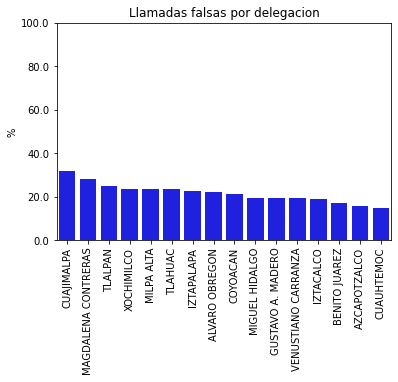

In [246]:
ax = sns.barplot(x="delegacion_cierre",
                 y="prop",
                 data=delegacion_falsas,
                 color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por delegacion",
       xlabel="",
       ylabel="%")
ax.set_ylim(0, 100)
plt.show()

In [247]:
clas_falsa = clas_falsa[clas_falsa['label'] == 1]\
 .sort_values('prop', ascending=False).reset_index()

clas_falsa

,clas_con_f_alarma,delegacion_cierre,label,num_llamadas,total,prop
0,FALSA ALARMA,ALVARO OBREGON,1,760,760,100.000000
1,FALSA ALARMA,MAGDALENA CONTRERAS,1,102,102,100.000000
2,FALSA ALARMA,IZTACALCO,1,248,248,100.000000
3,FALSA ALARMA,GUSTAVO A. MADERO,1,2166,2166,100.000000
4,FALSA ALARMA,CUAJIMALPA,1,135,135,100.000000
...,...,...,...,...,...,...
58,URGENCIAS MEDICAS,AZCAPOTZALCO,1,2799,25673,10.902505
59,URGENCIAS MEDICAS,BENITO JUAREZ,1,4368,42060,10.385164
60,URGENCIAS MEDICAS,CUAUHTEMOC,1,6260,66466,9.418349
61,DELITO,IZTACALCO,1,3,35,8.571429


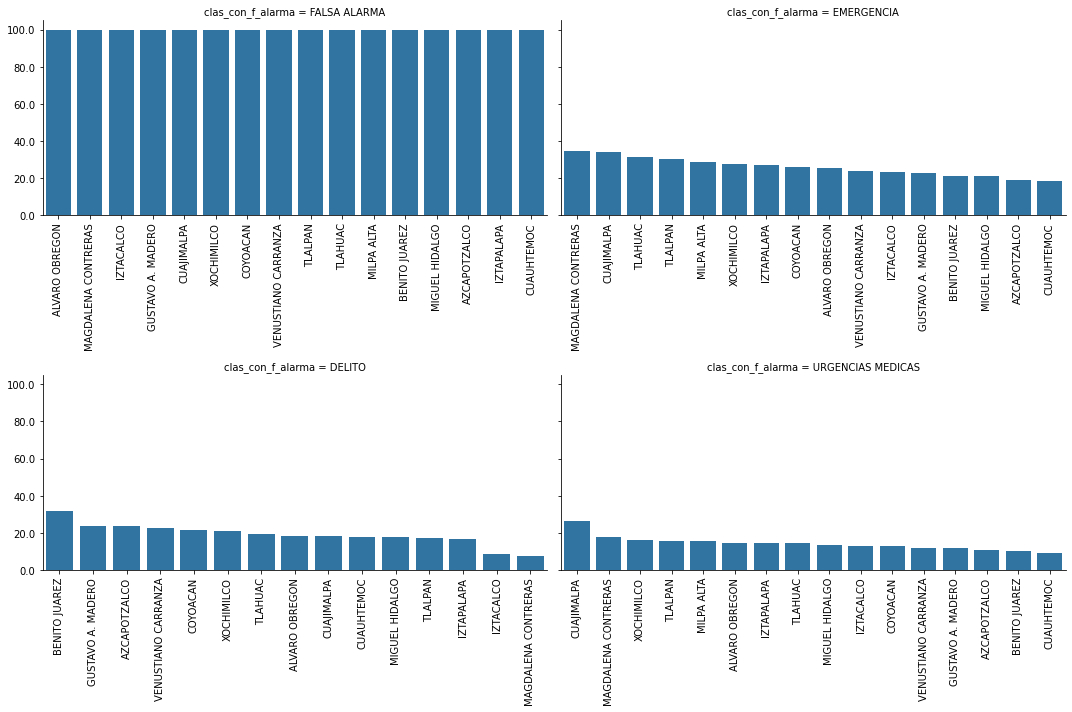

In [248]:
p = sns.FacetGrid(clas_falsa,
                  col="clas_con_f_alarma",
                  col_wrap=2,
                  sharex=False,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="prop", x="delegacion_cierre")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
p.tight_layout()
plt.show()